In [187]:
from astroquery.vizier import Vizier
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [80]:
v = Vizier(columns=['_RAJ2000', 'DEJ2000','B-V', 'Vmag', 'Plx','Dist','Bol_Corr'], column_filters={"Vmag":">10"}, keywords=["optical", "xry"])

In [127]:
lmxblist = ['1A0620-00', '4U1543-475', 'GRO J0422+32', 'GRO J1655-40', 'XTE J1752-223', 'XTE J1817-330', 'SWIFT J1753.5-0127', 'Cyg X-1', 'GRS1009-45', 'GRS1915+105', 'GS1124-684', 'GS1354-64', 'GS2000+251', 'GS2023+338', 'GX339-4', 'MAXI J1659-152', 'H1705-250', 'SAXJ1819.3-2525', 'SWIFTJ1357.2-0933', 'XTEJ1118+480', 'XTEJ1550-564', 'XTEJ1650-500', 'XTEJ1859+226', 'MAXI J1820+070']

In [156]:
def findCoordinates(name,catalogue='587'):
    try:
        v = Vizier(columns=['RAJ2000', 'DEJ2000', 'Vmag', 'Dist'])#, keywords=["optical", "xry"])
        result = v.query_object(name,catalog=[catalogue])
        ra = result[0][0][0]
        dec = result[0][0][1]
        dist = result[0][0][3]
        coords = [ra,dec]
    except:
        coords = 'none'
        dist = 'none'
    result = [coords,dist]
    return result

In [157]:
#Vizier.ROW_LIMIT.set('50')
dist = []
coords = []
for x in range(len(lmxblist)):
    coords.append(findCoordinates(lmxblist[x])[0])
    dist.append(findCoordinates(lmxblist[x])[1])
    print(coords[x])
# print(coords)
# dist

['06 22 44.500', '-00 20 44.720']
['15 47 08.320', '-47 40 10.800']
['04 21 42.790', '+32 54 27.100']
none
['17 52 15.090', '-22 20 32.360']
['18 17 43.530', '-33 01 07.570']
['17 53 28.290', '-01 27 06.220']
none
['10 13 35.600', '-45 04 35.280']
['19 15 11.550', '+10 56 44.800']
['11 26 26.650', '-68 40 32.830']
['13 58 09.700', '-64 44 05.800']
['20 02 49.480', '+25 14 11.360']
['20 24 03.820', '+33 52 01.900']
['17 02 49.400', '-48 47 23.400']
['16 59 01.680', '-15 15 28.730']
['17 08 15.520', '-25 05 30.150']
['18 19 21.580', '-25 24 25.100']
['13 57 16.820', '-09 32 38.550']
['11 18 10.790', '+48 02 12.420']
['15 50 58.700', '-56 28 35.200']
['16 50 00.980', '-49 57 43.600']
['18 58 41.580', '+22 39 29.400']
none


In [158]:
for x in range(len(dist)):
    if dist[x] == 'none':
        
        print(x, lmxblist[x])

(3, 'GRO J1655-40')
(7, 'Cyg X-1')
(23, 'MAXI J1820+070')


In [159]:
gr = ['16 54 00.14', '-39 50 44.90']
grd = 3.2
cyg = ['19 58 21.67595', '+35 12 05.7783']
cygd = 2.1

In [160]:
coords[3] = gr
dist[3] = grd
coords[7] = cyg
dist[7] = cygd

In [161]:
coords

[['06 22 44.500', '-00 20 44.720'],
 ['15 47 08.320', '-47 40 10.800'],
 ['04 21 42.790', '+32 54 27.100'],
 ['16 54 00.14', '-39 50 44.90'],
 ['17 52 15.090', '-22 20 32.360'],
 ['18 17 43.530', '-33 01 07.570'],
 ['17 53 28.290', '-01 27 06.220'],
 ['19 58 21.67595', '+35 12 05.7783'],
 ['10 13 35.600', '-45 04 35.280'],
 ['19 15 11.550', '+10 56 44.800'],
 ['11 26 26.650', '-68 40 32.830'],
 ['13 58 09.700', '-64 44 05.800'],
 ['20 02 49.480', '+25 14 11.360'],
 ['20 24 03.820', '+33 52 01.900'],
 ['17 02 49.400', '-48 47 23.400'],
 ['16 59 01.680', '-15 15 28.730'],
 ['17 08 15.520', '-25 05 30.150'],
 ['18 19 21.580', '-25 24 25.100'],
 ['13 57 16.820', '-09 32 38.550'],
 ['11 18 10.790', '+48 02 12.420'],
 ['15 50 58.700', '-56 28 35.200'],
 ['16 50 00.980', '-49 57 43.600'],
 ['18 58 41.580', '+22 39 29.400'],
 'none']

In [148]:
#coords = [[95.678839999999994, -0.36851], [236.78583333, -47.67073333], [65.42829167,  32.90752778], [253.47880000000001, -39.863799999999998], [268.02717000000001, -22.344462], [274.39254199999999, -33.021549999999998], [268.367875, -1.45172778], [299.59043000000003, 35.201650000000001], [153.35459499999999, -45.074216999999997], [288.77339799999999, 10.949256], [171.526962, -68.685677999999996], [209.50909999999999, -64.747600000000006], [300.67380000000003, 25.235600000000002], [305.97631999999999, 33.867384000000001], [255.65896699999999, -48.794212000000002], [254.727892, -15.271789], [257.02466199999998, -25.090333999999999], [274.80372, -25.403269999999999], [209.2886, -9.5348950000000006], [169.50416200000001, 48.019416999999997], [237.68720300000001, -56.466366999999998], [252.50036, -49.9482], [284.67160000000001, 22.635899999999999], [274.97899999999998, 7.0172999999999996]]

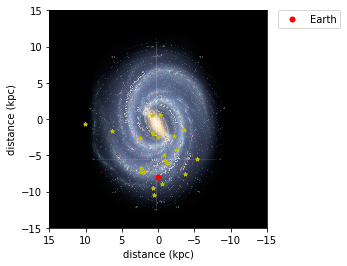

In [196]:
galcoords = []
galb = []
gall = []
for x in range(len(coords)-1):
    #print(coords[x])
    c = SkyCoord(coords[x][0]+coords[x][1], unit=(u.hourangle, u.deg))
    gal = c.galactic
    galcoords.append(gal)
    gall.append(gal.l.deg)
    galb.append(gal.b.deg)
img = mpimg.imread('/home/mj1e16/Gaia/620057main_milkyway_full.jpg')
imgplot = plt.imshow(img,extent=[-15,15,-15,15])
scaleupper = 1#1450/30
for x in range(len(gall)):
    plt.plot((dist[x]*np.sin(np.deg2rad(gall[x])))*scaleupper, ((dist[x]*np.cos(np.deg2rad(gall[x])))-8)*scaleupper, '*', color='y', markersize=4)#,label=lmxblist[x])
plt.plot(0,-8,'ro',markersize=5,label='Earth')

#plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-15*scaleupper,15*scaleupper])
plt.ylim([-15*scaleupper,15*scaleupper])
plt.xlabel('distance (kpc)')
plt.ylabel('distance (kpc)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.gca().invert_xaxis()
plt.show()

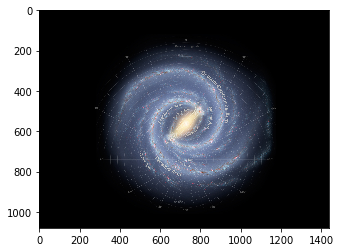

In [189]:
img = mpimg.imread('/home/mj1e16/Gaia/620057main_milkyway_full.jpg')
imgplot = plt.imshow(img)
plt.show()

In [178]:
dist

[1.0599999,
 7.5,
 2.49,
 3.2,
 6.0,
 5.5,
 6.0,
 2.1,
 3.8,
 9.0,
 5.9000001,
 25.0,
 2.7,
 2.3900001,
 6.0,
 8.6000004,
 8.6000004,
 6.1999998,
 2.29,
 1.7,
 4.5,
 2.5999999,
 12.5,
 'none']